Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB
None

First 5 Rows of the Dataset:
  Million Plus Cities   Cause category        Cause Subcategory  \
0                Agra  Traffic Control  Flashing Signal/Blinker   
1                Agra  Traffic Control  Flashing Signal/Blinker   
2                Agra  Traffic Control  Flashing Signal/Blinker   
3                Agra  Traffic Control  Flashing Signal/Blinker   
4                Agra  Traffic Control  Flashing Signal/Blinker   

         Outcome of Incident  Count  


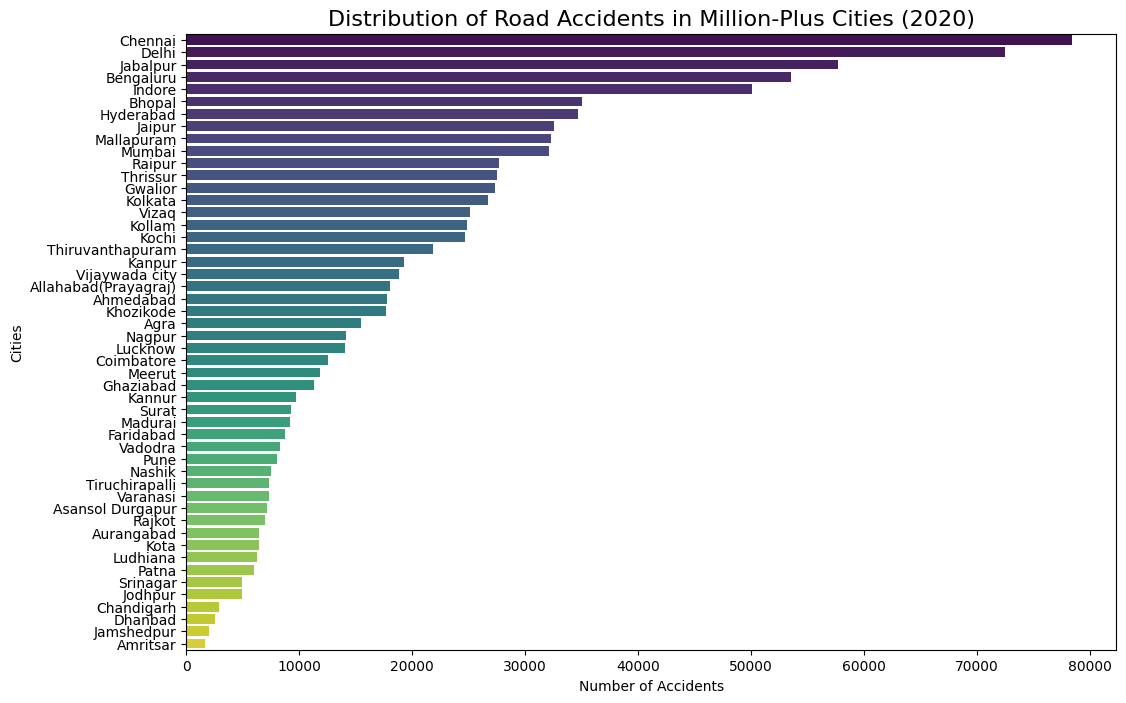

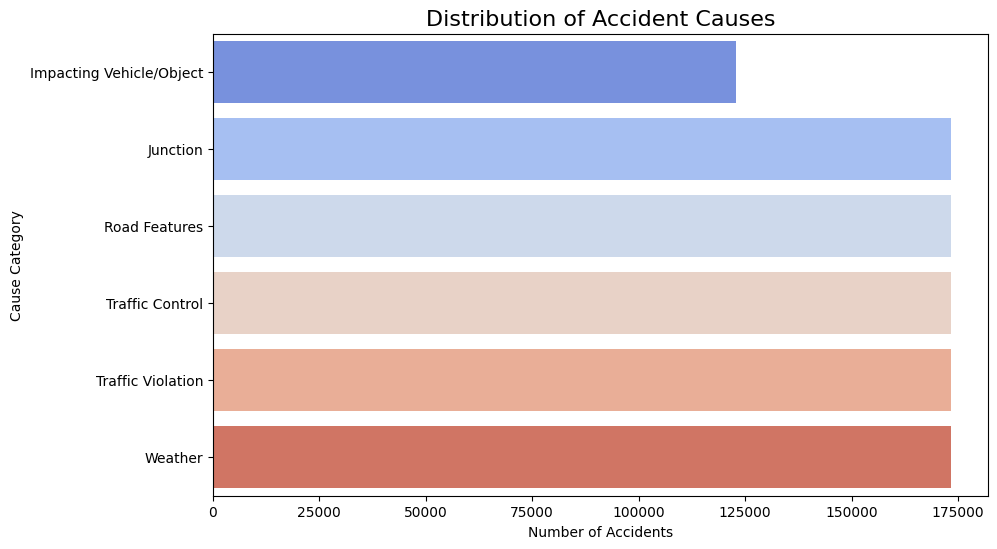

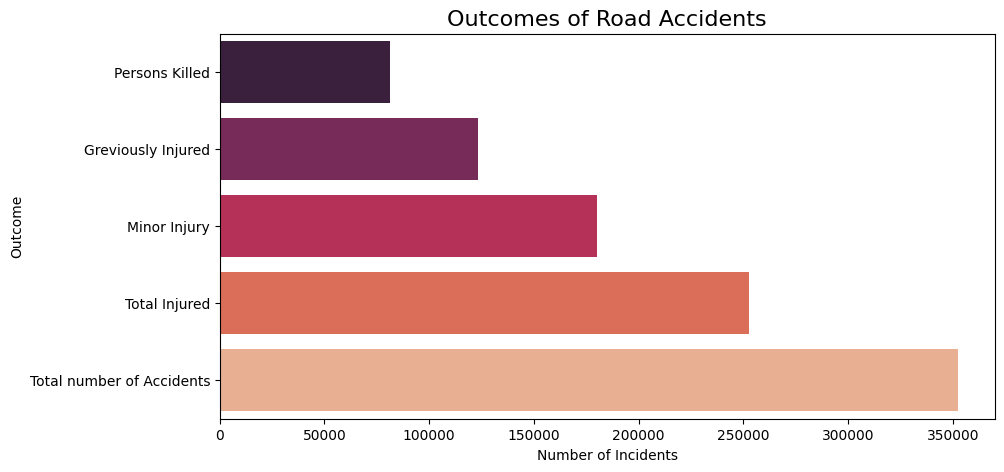

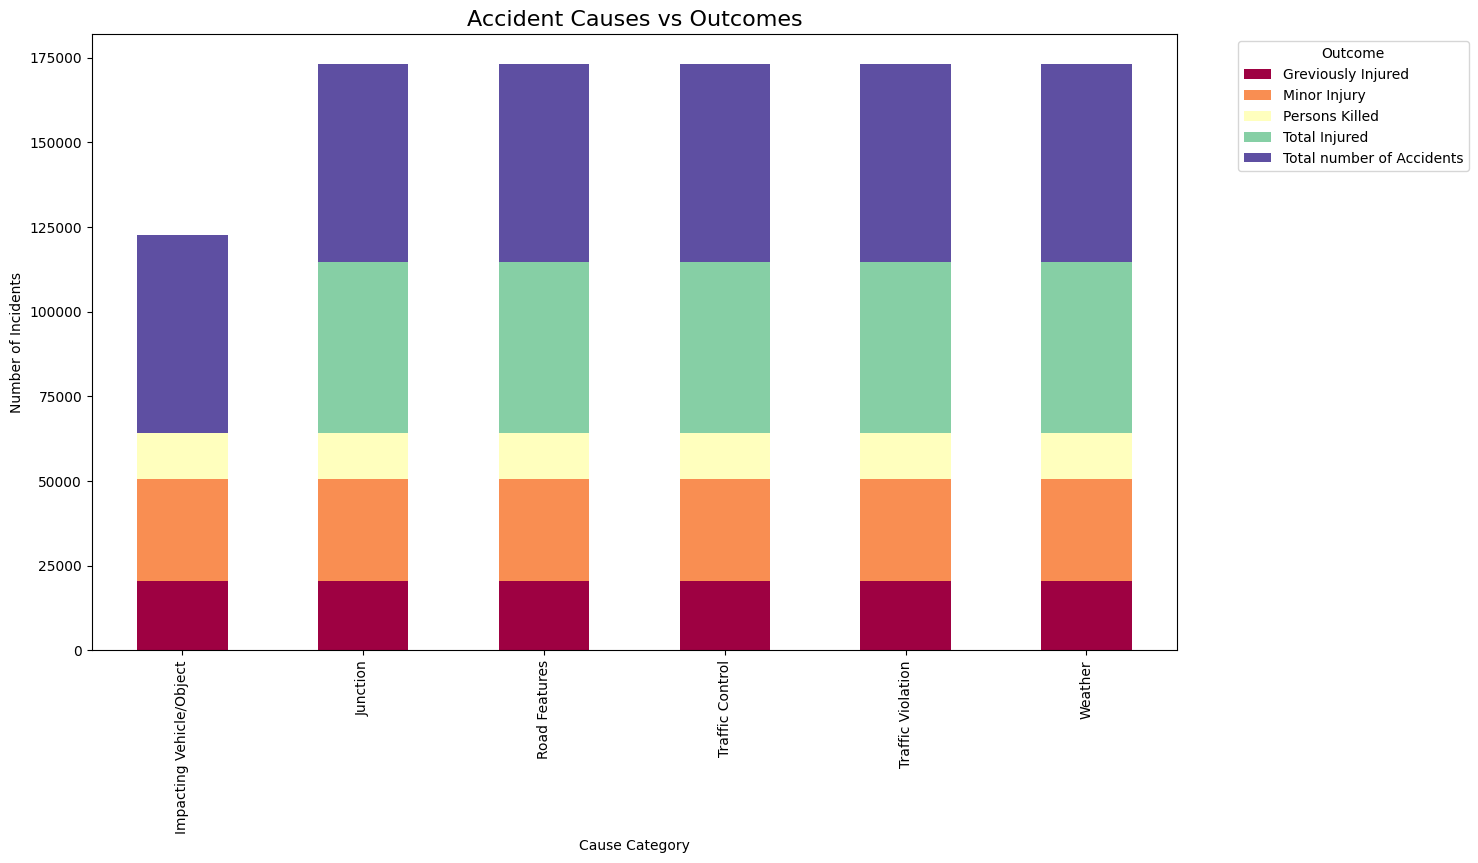

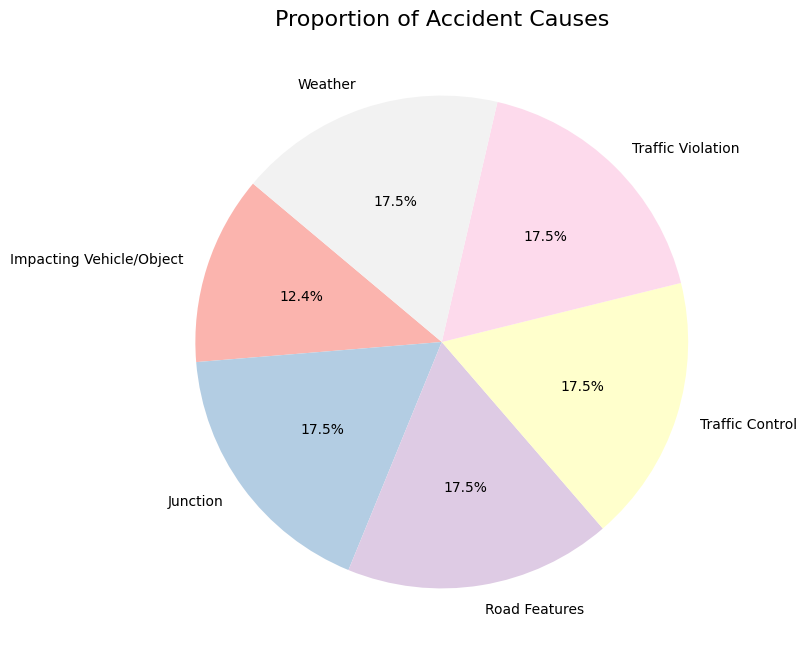

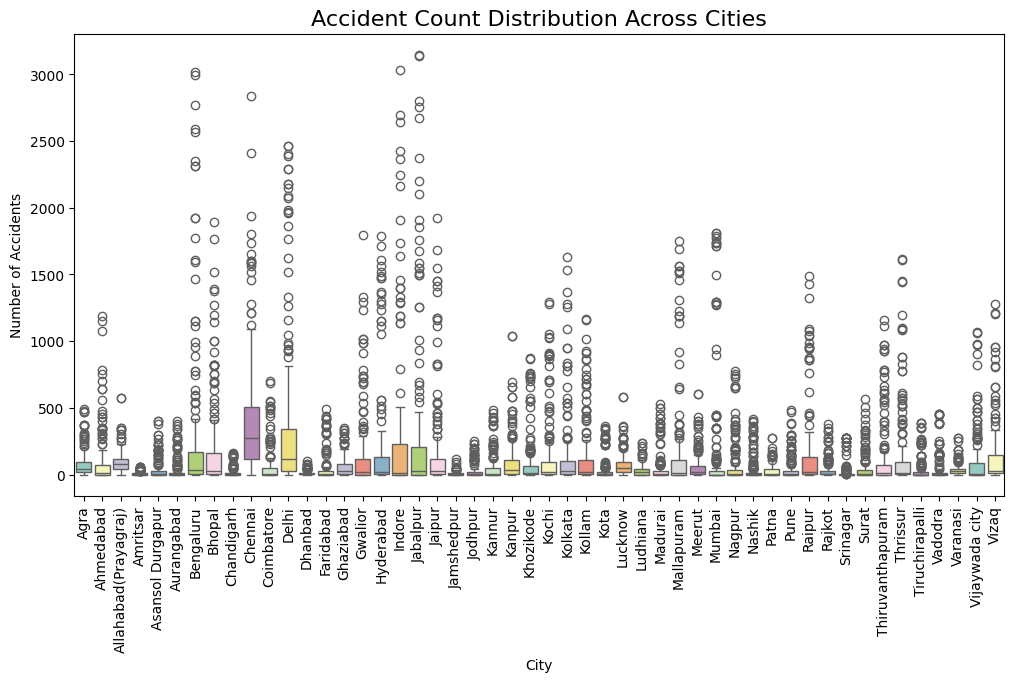

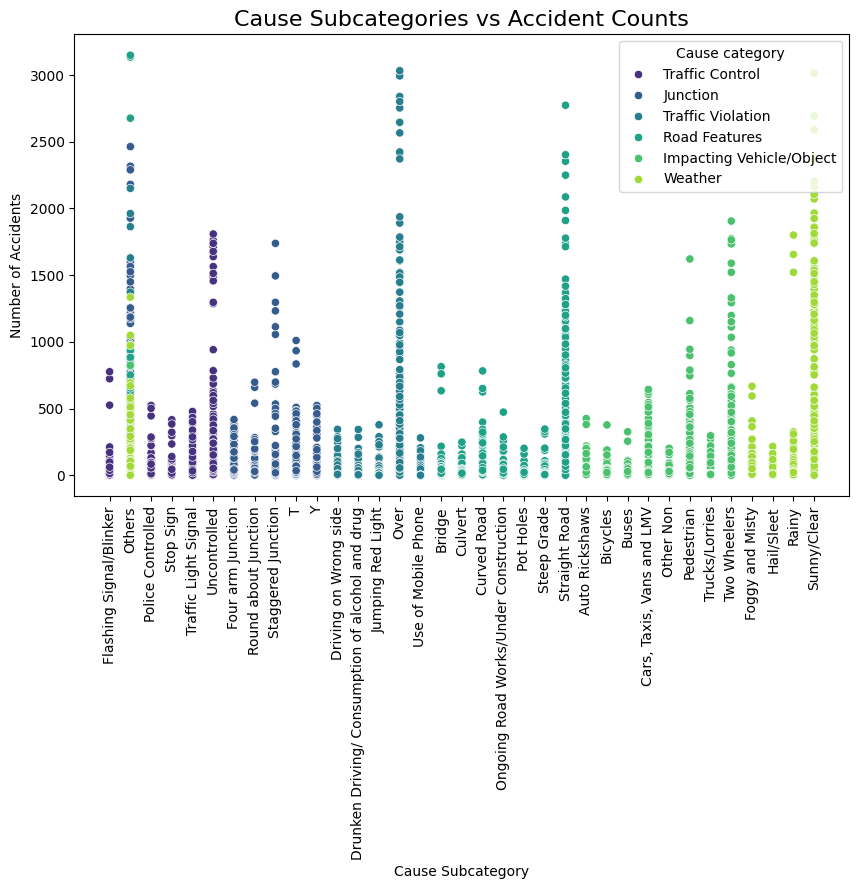

Analysis Completed!


In [3]:
# Road Accident Data Analysis

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

warnings.filterwarnings("ignore")

# Load the dataset
file_path = '/Users/krishnasingh/Desktop/Intetrn_Project/Regulatory Affairs of Road Accident Data 2020 India.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Data Cleaning
print("\nChecking for Missing Values:")
print(data.isnull().sum())

# Fill missing values in 'Count' column with 0
data['Count'].fillna(0, inplace=True)
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Exploratory Data Analysis
print("\nStarting Exploratory Data Analysis...")

# 1. Distribution of accidents across cities
city_accidents = data.groupby('Million Plus Cities')['Count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=city_accidents.values, y=city_accidents.index, palette='viridis')
plt.title('Distribution of Road Accidents in Million-Plus Cities (2020)', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Cities')
plt.show()

# 2. Accident causes distribution
cause_accidents = data.groupby('Cause category')['Count'].sum().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=cause_accidents.values, y=cause_accidents.index, palette='coolwarm')
plt.title('Distribution of Accident Causes', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Cause Category')
plt.show()

# 3. Outcomes of incidents
outcome_accidents = data.groupby('Outcome of Incident')['Count'].sum().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=outcome_accidents.values, y=outcome_accidents.index, palette='rocket')
plt.title('Outcomes of Road Accidents', fontsize=16)
plt.xlabel('Number of Incidents')
plt.ylabel('Outcome')
plt.show()

# 4. Accident causes vs outcomes (stacked bar chart)
cause_outcome = data.pivot_table(index='Cause category', columns='Outcome of Incident', values='Count', aggfunc='sum')
cause_outcome.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Spectral')
plt.title('Accident Causes vs Outcomes', fontsize=16)
plt.xlabel('Cause Category')
plt.ylabel('Number of Incidents')
plt.legend(title='Outcome', bbox_to_anchor=(1.05, 1))
plt.show()


# 5. Proportion of accident causes (pie chart)
cause_proportions = data.groupby('Cause category')['Count'].sum()
cause_proportions.plot.pie(figsize=(8, 8), autopct='%1.1f%%', startangle=140, colormap='Pastel1')
plt.title('Proportion of Accident Causes', fontsize=16)
plt.ylabel('')
plt.show()

# 6. City-wise accident count distribution (box plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Million Plus Cities', y='Count', data=data, palette='Set3')
plt.xticks(rotation=90)
plt.title('Accident Count Distribution Across Cities', fontsize=16)
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.show()

# 7. Cause subcategories vs counts (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cause Subcategory', y='Count', hue='Cause category', data=data, palette='viridis')
plt.xticks(rotation=90)
plt.title('Cause Subcategories vs Accident Counts', fontsize=16)
plt.xlabel('Cause Subcategory')
plt.ylabel('Number of Accidents')
plt.show()

print("Analysis Completed!")
